# Clustering and medoid solution extraction

In [1]:
import policy_epidemic_model_code
from jupyterWidgets import *

import importlib

import numpy as np
import importlib
import matplotlib.pyplot as plt

import pandas as pd
import visualization

from kMedoids_clustering import GetSwitch, GetCluster, CalcPearson, GetInitialMedoids, kMedoids
from math import floor
from run_definitions import get_runs_definitions
# reimports to avoid restarting kernel after every update
importlib.reload(policy_epidemic_model_code)
from policy_epidemic_model_code import *

importlib.reload(visualization)
from visualization import *
from run_tools import create_simu_run, create_sub_policy, create_policy, Policy_template, Policy, collect_results, \
    cluster_run, extract_selected

In [16]:
runs_to_cluster =['combo_base_case_tc_1000000', 
                    'combo_base_case_tc_2500000', 
                    'combo_base_case_tc_5000000', 
                    'combo_base_case_tc_25000000', 
                    'combo_base_case_tc_50000000', 
                    'combo_base_case_tc_100000000', 
                    'test_and_trace_lockdown_opt_eta50',
                    'test_and_trace_lockdown_opt_eta75',
                    'test_and_trace_lockdown_opt_eta100',
                    'combo_base_case',
                      'base_case_lockdown_opt', 
                      'base_case_lockdown_opt_with_limited_general_testing' , 
                   'base_case_lockdown_opt_with_limited_sens075_general_testing', 
                   'base_case_lockdown_opt_with_limited_spec075_general_testing',
                  'base_case_lockdown_opt_with_limited_sens090_general_testing',
                   'base_case_lockdown_opt_with_limited_spec090_general_testing' , 
                   'base_case_lockdown_opt_with_limited_imperfect(0.75)_general_testing', 
                   'base_case_lockdown_opt_with_limited_imperfect(0.95)_general_testing', 
                    'romer_spec_085',
                    'romer_sens_spec_085', 
                    'romer_sens_spec_095', 
                    'romer_sens_spec_099', 
                    'romer_tc_1000000_sens_spec_085', 
                    'romer_tc_2500000_sens_spec_085', 
                    'romer_tc_5000000_sens_spec_085', 
                    'romer_tc_25000000_sens_spec_085', 
                    'romer_tc_50000000_sens_spec_085', 
                    'romer_tc_100000000_sens_spec_085']

n_clusters = 15
all_runs = get_runs_definitions()
full_results = {}

run_clusters = {}
run_medoids = {}
run_medoid_results = {}
for run in runs_to_cluster:
    print("clustering run: ", run)
    full_results[run] = pd.read_csv('active_results/' + run + '_full_results.csv', delimiter=',')
    run_policies_df = full_results[run].drop(columns=['Deaths', 'Economic impact', 'cluster'], errors='ignore')
    cluster_results = cluster_run(run, run_policies_df, n_clusters, scale_types=True)
    run_clusters[run] = cluster_results[0]
    run_medoids[run] = cluster_results[1]
    loc = len(full_results[run].columns)
    full_results[run].insert(loc, 'cluster', run_clusters[run])
    full_results[run].to_csv('active_results/' + run + '_full_results_clustered' + '.csv')
    run_medoid_res = extract_selected([run], full_results[run], run_medoids, save_csv=True, csv_identifier='medoid') # saves medoid solutions to run specific csv's
    run_medoid_results[run] = run_medoid_res



clustering run:  combo_base_case_tc_1000000
0
1
2
3
4
No improvement found
clustering run:  combo_base_case_tc_2500000
0
1
2
3
No improvement found
clustering run:  combo_base_case_tc_5000000
0
1
2
3
4
5
6
7
No improvement found
clustering run:  combo_base_case_tc_25000000
0
1
2
3
4
5
6
No improvement found
clustering run:  combo_base_case_tc_50000000
0
1
2
3
4
5
6
7
No improvement found
clustering run:  combo_base_case_tc_100000000
0
1
2
3
4
5
No improvement found
clustering run:  test_and_trace_lockdown_opt_eta50
0
1
2
3
4
5
6
No improvement found
clustering run:  test_and_trace_lockdown_opt_eta75
0
1
2
3
No improvement found
clustering run:  test_and_trace_lockdown_opt_eta100
0
1
2
3
4
5
No improvement found
clustering run:  combo_base_case
0
1
2
3
4
No improvement found
clustering run:  base_case_lockdown_opt
0
1
2
3
4
No improvement found
clustering run:  base_case_lockdown_opt_with_limited_general_testing
0
1
2
3
4
5
No improvement found
clustering run:  base_case_lockdown_opt_wi

<function matplotlib.pyplot.show(*args, **kw)>

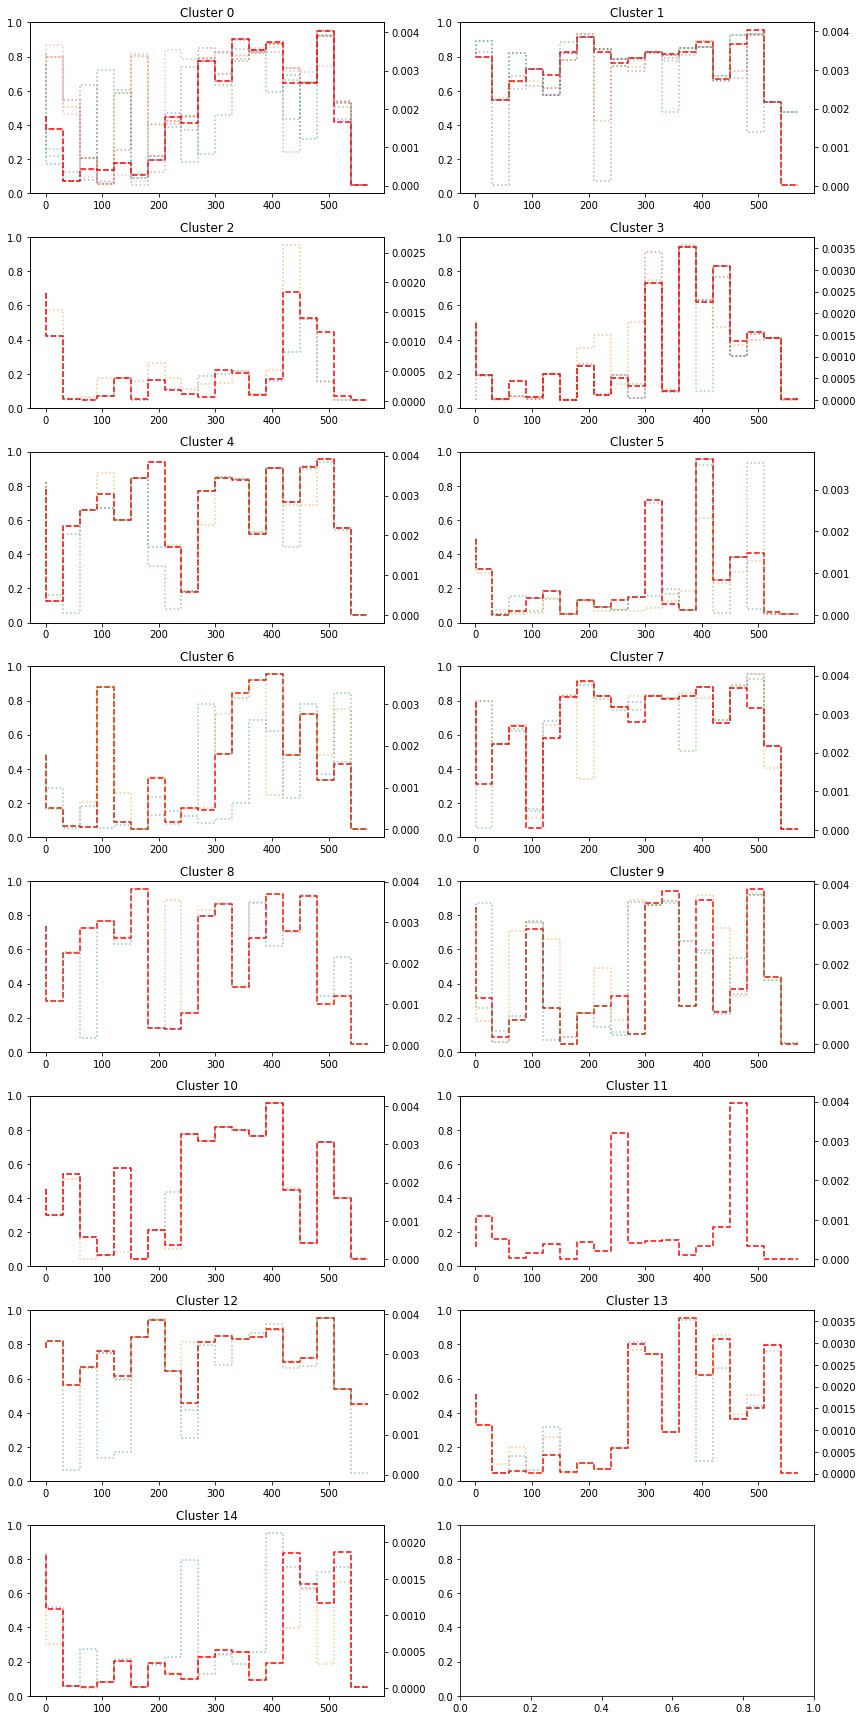

In [29]:
run = 'romer_tc_5000000_sens_spec_085'
#run = 'base_case_lockdown_opt'
#run = 'base_case_lockdown_opt_with_limited_general_testing'
k = n_clusters

fig, axes = plt.subplots(nrows=(int((k+1)/2)), ncols=2, figsize=(12,24) )

for i in range(0,k):
    cluster_policies = full_results[run].drop(columns=['Deaths', 'Economic impact', 'cluster'])[full_results[run]['cluster']==i]
    axes[floor(i/2), i%2].set_title("Cluster " + str(i) )
    cluster_policies.columns = [eval(c) for c in cluster_policies.columns]
    policy_types = np.unique([c[0] for c in cluster_policies.columns])
    
    for type in policy_types:
        
        col_list = [c for c in cluster_policies.columns if c[0]==type]
        t = [col[1] for col in col_list]
        if type=='ld': 
            color='blue'
        else: 
            color='red'
            secax = axes[floor(i/2), i%2].twinx()
                
        for pol_i, pol in enumerate(cluster_policies.index):
            if type=='ld':
                if pol in run_medoids[run]:
                    axes[floor(i/2), i%2].step(t, cluster_policies.loc[pol,col_list], '--', c=color)
                else:
                    axes[floor(i/2), i%2].step(t, cluster_policies.loc[pol,col_list], ':', alpha=0.5)
                #axes[floor(i/2), i%2].legend(fontsize='x-small')
            elif type=='test':
                
                if pol in run_medoids[run]:
                    secax.step(t, cluster_policies.loc[pol,col_list], '--', c=color)
                else:
                    secax.step(t, cluster_policies.loc[pol,col_list], ':', alpha=0.5)
plt.tight_layout()
plt.show

### 

In [13]:
runs_to_cluster =['base_case_lockdown_opt']

n_clusters = 10
all_runs = get_runs_definitions()
full_results = collect_results(runs_to_cluster, save_csv=False)

run_clusters = {}
run_medoids = {}
run_medoid_results = {}
for run in runs_to_cluster:
    run_policies_df = pd.read_csv('active_results/' + run + '_results.csv', delimiter=',')
    cluster_results = cluster_run(run, run_policies_df, n_clusters)
    run_clusters[run] = cluster_results[0]
    run_medoids[run] = cluster_results[1]
    loc = len(full_results[run].columns)
    full_results[run].insert(loc, 'cluster', run_clusters[run])
    full_results[run].to_csv('active_results/' + run + '_full_results' + '.csv')
    run_medoid_res = extract_selected([run], run_medoids, save_csv=True, csv_identifier='combo_cluster_test') # saves medoid solutions to run specific csv's
    run_medoid_results[run] = run_medoid_res


{'ld': 0.9999932127124026}  |  {'ld': 0.5005045758081911}
